In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datadataset 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Korisnik\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
df['job_skills'][5]

['python', 'sql', 'gcp']

Problem Statement:
Using the ast library, clean up the job_skills column to be of the list data type in preparation for exploding this column.
NOTE: For future problems, it'll be assumed that you have done this step in preparation for exploding this column.
Explode the job_skills column in the DataFrame and create a bar plot using pandas of the top 10 most common skills for Cloud Engineer.
Add labels for the x-axis (label as 'Skills'), y-axis (label as 'Count') and a title (set as 'Top 10 Most Common Skills for Cloud Engineers') for the plot.
Hint:
Filter out the DataFrame to only get Cloud Engineer jobs and use the explode() function on the job_skills column, then use value_counts(), and finally use plot() to create a bar plot.

In [3]:
import ast

In [4]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [14]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_ce.explode('job_skills')
df_exploded


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,javascript,"{'cloud': ['gcp', 'aws'], 'libraries': ['selen..."
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,python,"{'cloud': ['gcp', 'aws'], 'libraries': ['selen..."
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,gcp,"{'cloud': ['gcp', 'aws'], 'libraries': ['selen..."
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,aws,"{'cloud': ['gcp', 'aws'], 'libraries': ['selen..."
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11-11 14:06:06,False,False,Mexico,None,NaN,NaN,Zipdev,selenium,"{'cloud': ['gcp', 'aws'], 'libraries': ['selen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785664,Cloud Engineer,Performance Engineer,"Colombia, Huila, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-10-23 06:31:30,True,False,Colombia,None,NaN,NaN,"Perficient, Inc",excel,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785664,Cloud Engineer,Performance Engineer,"Colombia, Huila, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-10-23 06:31:30,True,False,Colombia,None,NaN,NaN,"Perficient, Inc",docker,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785672,Cloud Engineer,"Customer Engineer, Apigee, Google Cloud","Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08-29 06:47:39,False,False,Argentina,None,NaN,NaN,Emprego,None,None
785677,Cloud Engineer,"Engineer 3, Facilities","Penang, Malaysia",via Smart Recruiters Jobs,Full-time,False,Malaysia,2023-12-21 06:12:22,False,False,Malaysia,None,NaN,NaN,Western Digital,None,None


In [13]:
skill_counts = df_exploded['job_skills'].value_counts().head(10)
skill_counts

job_skills
python        3116
aws           3075
azure         2943
sql           2227
linux         1637
terraform     1607
kubernetes    1554
java          1217
gcp           1200
docker        1152
Name: count, dtype: int64

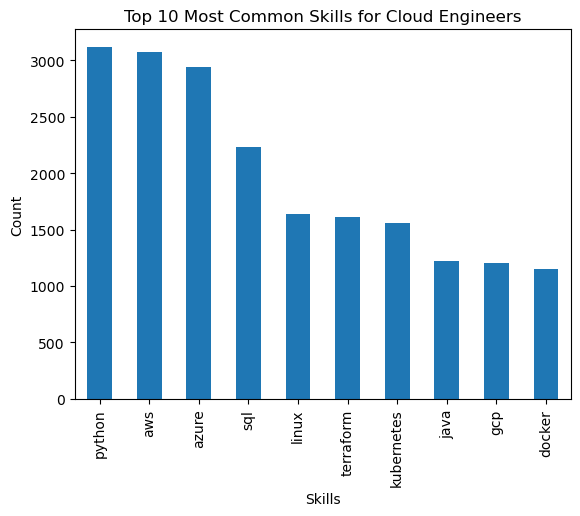

In [12]:
skill_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineers')
plt.show()

Problem Statement:
Explode the job_skills column in the DataFrame and calculate the average salary for each skill. Display the top 5 skills with the highest average salary.

Hint:
Use the explode() function on the job_skills column.

In [23]:
df_exploded2 = df.explode('job_skills')
df_exploded2

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [45]:
skills_salary = df_exploded2.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skills_salary.sort_values(by='salary_year_avg', ascending=False).head(20)

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526
240,watson,157102.290323
136,node,156697.295455
89,haskell,155757.666667
10,asp.net core,155000.000000
198,solidity,153639.950000


Problem Statement:
Calculate the number of unique skills required for each job_title_short.

Explode the job_skills column

Group by job_title_short

Count unique skills per title (i.e., num_unique_skills)

Rename the result column to num_unique_skills and show the first 5 rows

Hint:
Use the explode() function on the job_skills column, then group by job_title_short and use nunique() to count the number of unique skills for each job posting.

In [44]:
df_exploded3 = df.explode('job_skills')
num_unique_skills = df_exploded3.groupby('job_title_short')['job_skills'].nunique().reset_index()
num_unique_skills.columns = ['job_skills', 'num_unique_skills']
num_unique_skills.head(10)

,job_skills,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
5,Machine Learning Engineer,222
6,Senior Data Analyst,207
7,Senior Data Engineer,226
8,Senior Data Scientist,215
9,Software Engineer,239
